In [ ]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns


Setup

In [ ]:
def generate_y(M,N,s,sigma,noise):
    A = np.random.standard_normal(size = (M,N))
    A = normalize(A, axis=0, norm='l2') 

    x = np.zeros(shape=(N,1))
    nonzeros = np.random.choice(N,size = s,replace=False) #replace = False: unique indices
    for i in nonzeros:
        x[i] = np.random.choice([-1,1]) * np.random.uniform(1,10)
    s_i = np.nonzero(x)[0]

    if noise == True:
        n = np.random.normal(loc=0,scale=sigma,size=(M,1))
    else:
        n = np.zeros(shape=(M,1))

    y = A.dot(x)+n
    return y, A, x, s_i


In [53]:

def OMP(A,y,threshold,s=None):
    r = y
    indices = []
    iteration = 0
    while np.linalg.norm(r,ord=2) > threshold:
        if s is not None and iteration >= s:
            break
        A_i = np.argmax(np.absolute(A.T.dot(r)))
        indices.append(A_i)
        A_omp = A[:,indices] #get whole column that cause largest A_col.T.dot(r)
        x_hat = np.zeros(shape=(A.shape[1],1))
        x_hat[indices] = np.linalg.inv(A_omp.T.dot(A_omp)).dot(A_omp.T).dot(y) #replace initial 0 with new x value
        r = y - A.dot(x_hat)
        iteration += 1
    return r, indices, x_hat


In [54]:
def simulation(M, N, s, sigma, noise, threshold, mode='P3'):
    normalized_error = 0
    exact_support_recovery = 0 #ESR
    success_count = 0
    for runs in range(2000):
        y, A, x, s_i= generate_y(M,N,s,sigma,noise)
        # _, indices, x_hat = OMP(A,y,threshold)
        if mode == 'P4a':
            _, indices, x_hat = OMP(A, y, threshold=1e-10, s=s)
        elif mode == 'P4b':
            noise_level = np.sqrt(M) * sigma
            _, indices, x_hat = OMP(A, y, threshold=noise_level, s=None)
        else:
            _, indices, x_hat = OMP(A, y, threshold=threshold, s=None)
        if set(indices) == set(s_i):
            exact_support_recovery += 1
        numerator = np.linalg.norm(x-x_hat,ord=2)
        denominator = np.linalg.norm(x,ord=2)
        if denominator != 0:
            normalized_error += numerator/denominator
            if numerator/denominator < 1e-3:
                success_count += 1

    av_normalized_error = normalized_error/2000
    prob_ESR = exact_support_recovery/2000
    prob_success = success_count / 2000
    return av_normalized_error, prob_ESR, prob_success



Problem 3. Noiseless Phase Transition

In [ ]:

# M<N
def phase_transition(N,noise,sigma,s,threshold, mode='P3'):
    M_range = range(0,N)
    smax = range(0, N)
    prob_ESR_data = np.zeros((len(M_range),len(smax)))
    prob_success_data = np.zeros((len(M_range), len(smax))) 
    av_Normalized_Error_data = np.zeros((len(M_range),len(smax)))
    for m in M_range:
        for s in smax:
            if m > 0 and s > 0 and s <= m:  
                av_normalized_error, prob_ESR, prob_success = simulation(m, N, s, sigma,noise, threshold=threshold, mode=mode)
                prob_ESR_data[m,s] = prob_ESR
                prob_success_data[m, s] = prob_success
                av_Normalized_Error_data[m,s] = av_normalized_error
            else:
                prob_ESR_data[m,s] = 0.0
                prob_success_data[m, s] = 0.0
                av_Normalized_Error_data[m,s] = 1.0

    if mode == 'P3':
        plt.figure(figsize=(8, 6))
        heatmap_n0 = sns.heatmap(prob_ESR_data, cmap="crest",xticklabels=True, yticklabels=True)
        heatmap_n0.invert_yaxis()
        heatmap_n0.set_xlabel('s')
        heatmap_n0.set_ylabel('m')
        heatmap_n0.set_title(f'Probability of Exact Support Recovery for $N={N}$')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 6))
        heatmap_n0 = sns.heatmap(av_Normalized_Error_data, xticklabels=True, yticklabels=True)
        heatmap_n0.invert_yaxis()
        heatmap_n0.set_xlabel('s')
        heatmap_n0.set_ylabel('m')
        heatmap_n0.set_title(f'average Normalized Error for $N={N}$')
        plt.tight_layout()
        plt.show()
    else:
        if mode == 'P4a':
            mode_name = 'Known s'
        else:
            mode_name = 'Known ||n||2'
        plt.figure(figsize=(8, 6))
        heatmap_n0 = sns.heatmap(prob_success_data, cmap="crest",xticklabels=True, yticklabels=True)
        heatmap_n0.invert_yaxis()
        heatmap_n0.set_xlabel('s')
        heatmap_n0.set_ylabel('m')
        heatmap_n0.set_title(f'Probability of Success (Error < 1e-3) for $N={N}$, $\\sigma$={sigma}, {mode_name}')
        plt.tight_layout()
        plt.show()

      
    

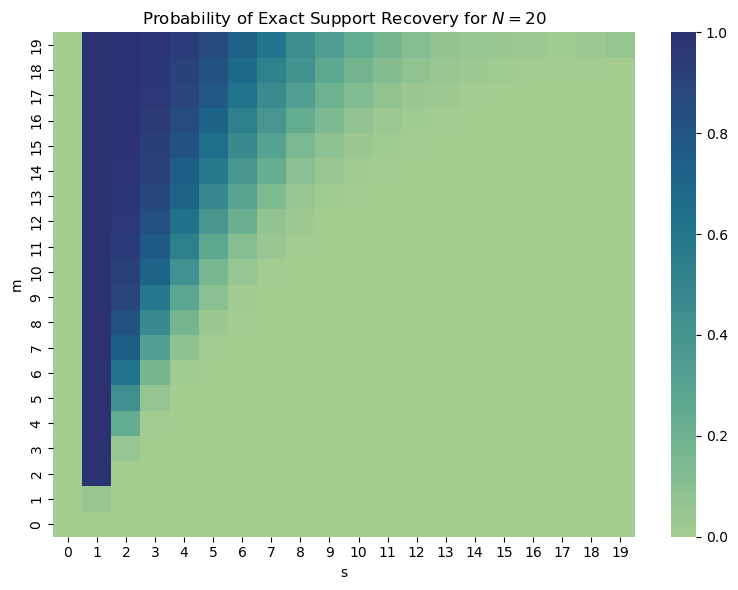

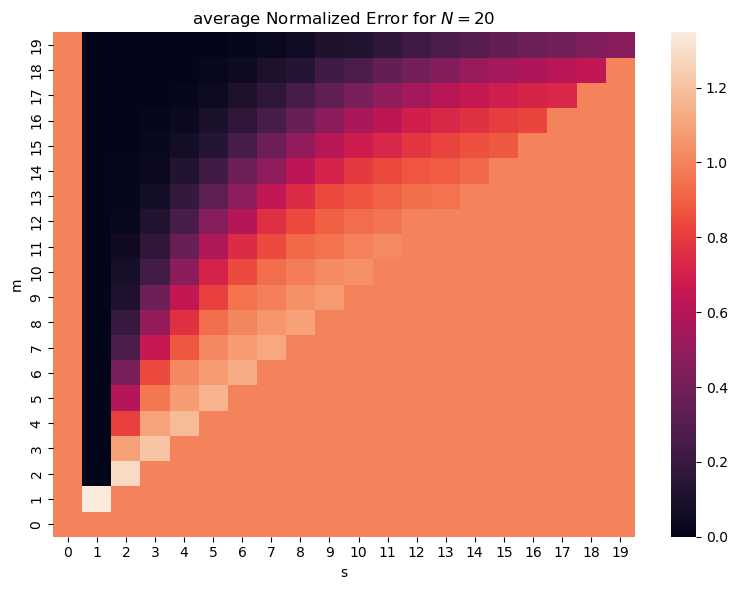

In [60]:
phase_transition(N=20, noise=False, sigma=0, s=None,threshold=1e-5, mode='P3')

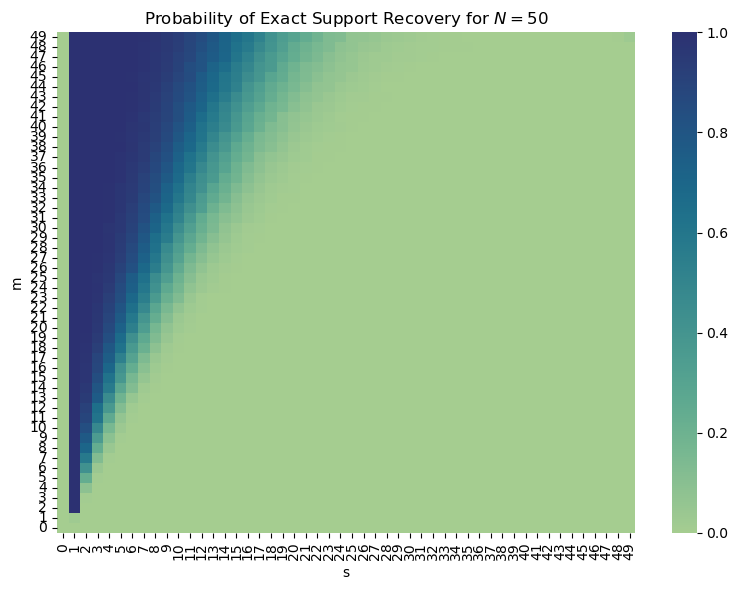

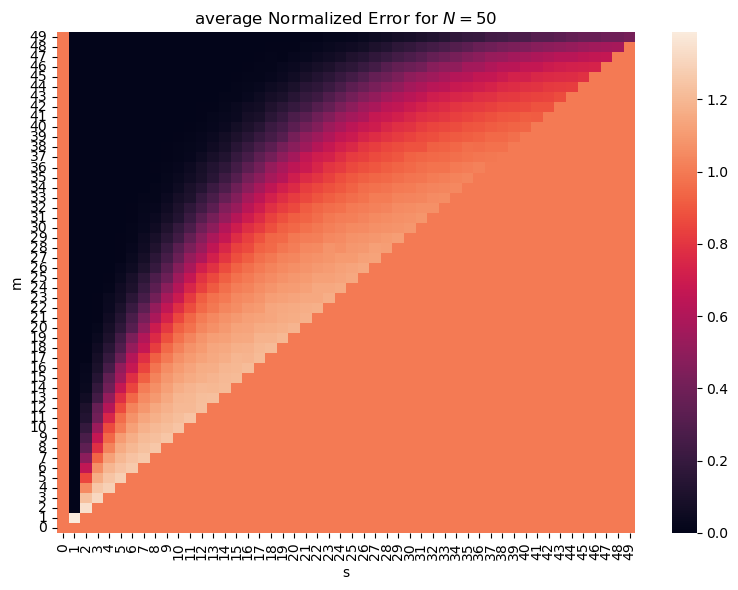

In [61]:
phase_transition(N=50, noise=False, sigma=0, s=None, threshold=1e-5, mode='P3')

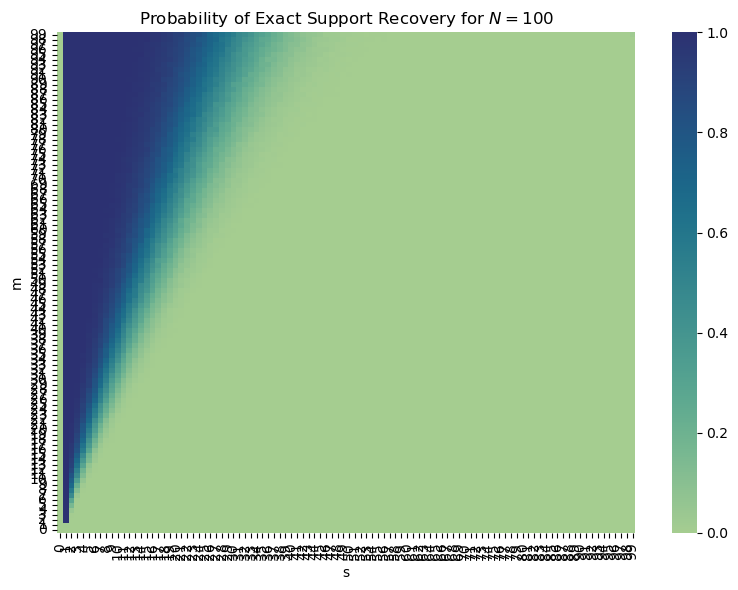

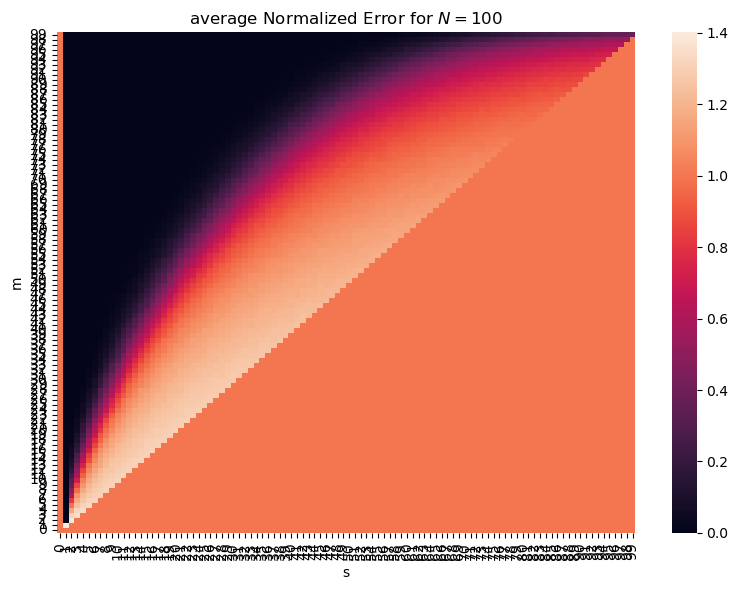

In [62]:
phase_transition(N=100, noise=False, sigma=0, s=None, threshold=1e-5, mode='P3')

Problem 4. Noisy case: (n != 0) (a)

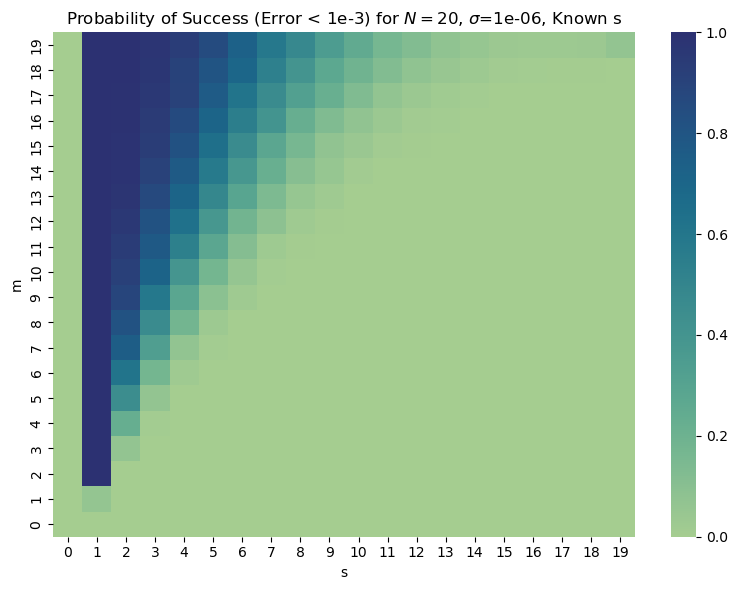

In [63]:
phase_transition(N=20, noise=True, sigma=1e-6, s=5, threshold=1e-5, mode='P4a')

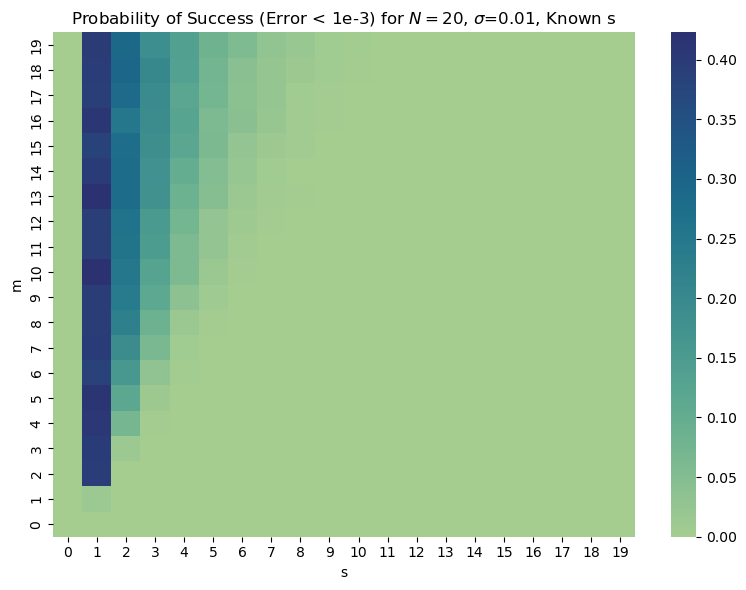

In [64]:
phase_transition(N=20, noise=True, sigma=1e-2, s=5, threshold=1e-5, mode='P4a')

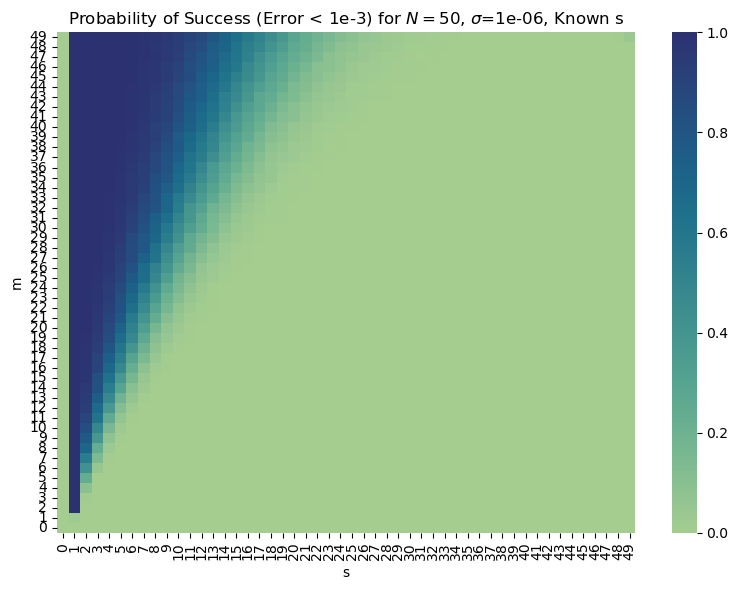

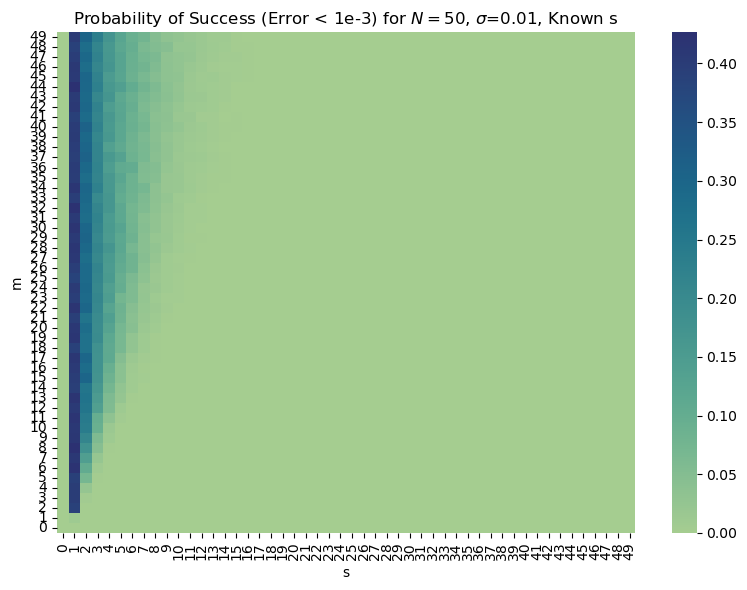

In [65]:
phase_transition(N=50, noise=True, sigma=1e-6, s=5, threshold=1e-5, mode='P4a')
phase_transition(N=50, noise=True, sigma=1e-2, s=5, threshold=1e-5, mode='P4a')


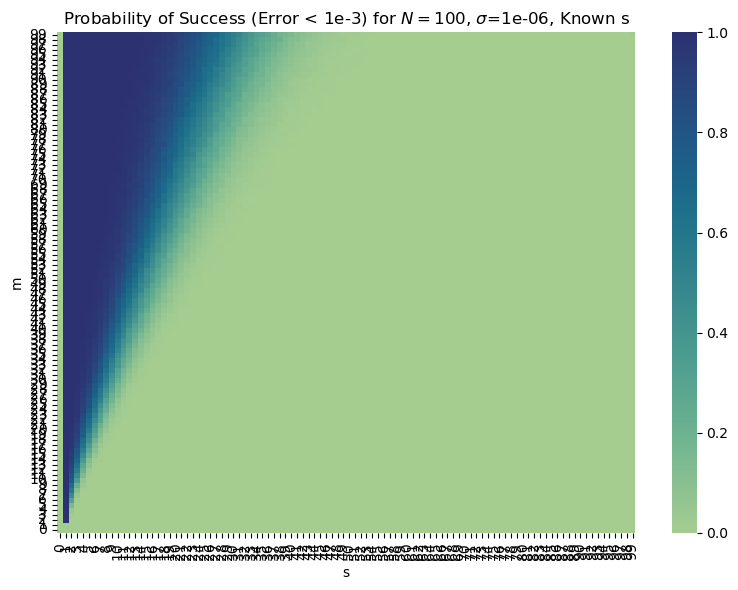

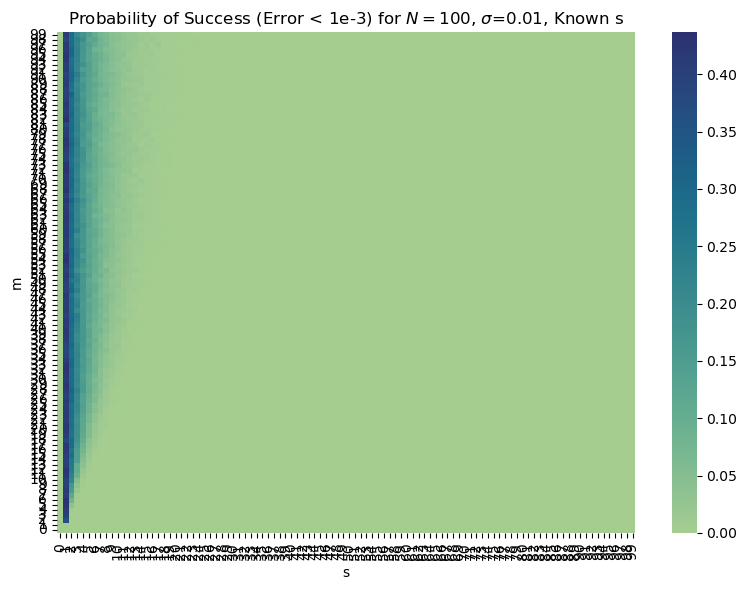

In [66]:
phase_transition(N=100, noise=True, sigma=1e-6, s=5, threshold=1e-5, mode='P4a')
phase_transition(N=100, noise=True, sigma=1e-2, s=5, threshold=1e-5, mode='P4a')


In [71]:
def simulation_p4a(M, N, s, sigma):
    normalized_error = 0
    success_count = 0
    for runs in range(2000):
        y, A, x, s_i= generate_y(M,N,s,sigma,noise=True)
        _, indices, x_hat = OMP(A, y, threshold=1e-10, s=s)
        numerator = np.linalg.norm(x-x_hat,ord=2)
        denominator = np.linalg.norm(x,ord=2)
        if denominator != 0:
            normalized_error += numerator/denominator
            if numerator/denominator < 1e-3:
                success_count += 1

    av_normalized_error = normalized_error/2000
    prob_success = success_count / 2000
    return av_normalized_error, prob_success

In [ ]:
# from scipy.ndimage import zoom
def phase_transition_p4a(N, sigma):
    prob_success_data = np.zeros((N, N))
    for m in range(1, N):
        for s in range(1, m): 
            _, prob_success = simulation_p4a(m, N, s, sigma)
            prob_success_data[m, s] = prob_success

    # scale = N/len(list(range(1,N,3)))
    # prob_success_data_plot = zoom(prob_success_data, scale)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(prob_success_data, cmap="crest")
    ax.invert_yaxis()
    ax.set_xlabel('s')
    ax.set_ylabel('M')
    ax.set_title(f'P4a Phase Transition (Known s), N={N}, sigma={sigma}')
    plt.tight_layout()
    plt.show()

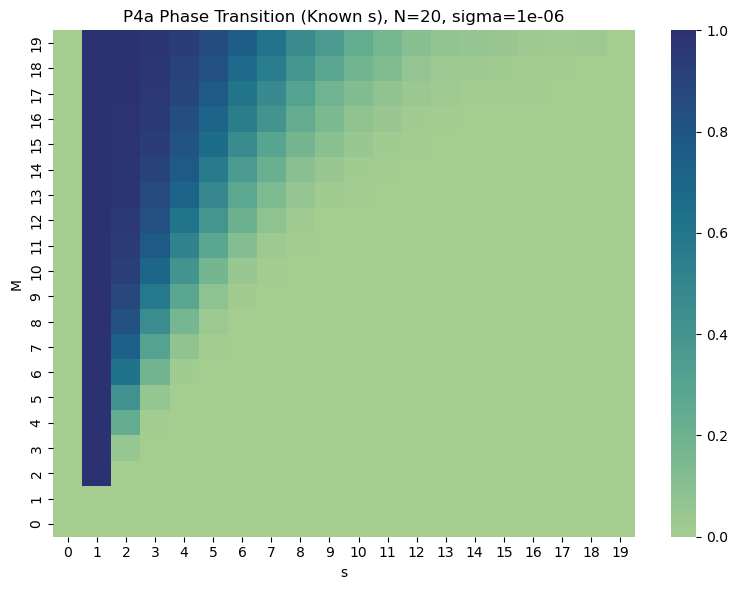

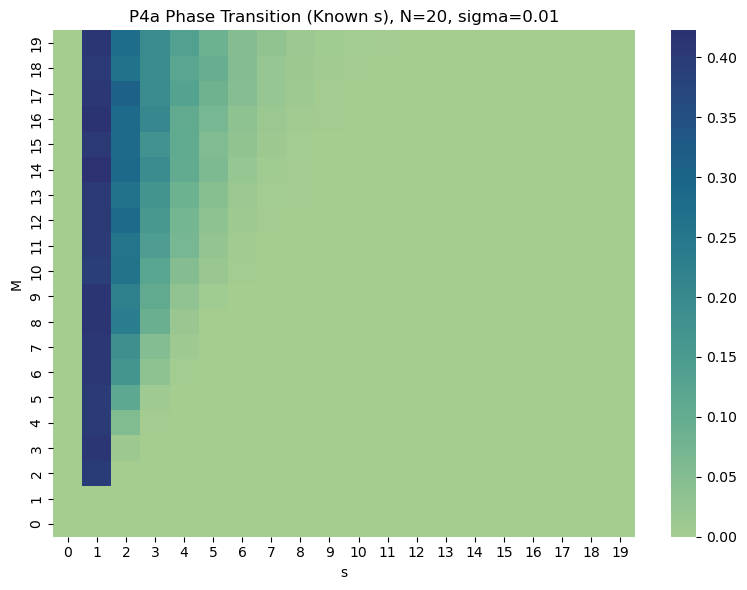

In [78]:
phase_transition_p4a(N=20, sigma=1e-6)
phase_transition_p4a(N=20, sigma=1e-2)


Problem 4(b)

In [82]:
def generate_y_p4b(M,N,s,sigma):
    A = np.random.standard_normal(size = (M,N))
    A = normalize(A, axis=0, norm='l2') 

    x = np.zeros(shape=(N,1))
    nonzeros = np.random.choice(N,size = s,replace=False) #replace = False: unique indices
    for i in nonzeros:
        x[i] = np.random.choice([-1,1]) * np.random.uniform(1,10)
    s_i = np.nonzero(x)[0]

    n = np.random.normal(loc=0,scale=sigma,size=(M,1))
    y = A.dot(x)+n
    return y, A, x, s_i, n


In [83]:
def simulation_p4b(M, N, s, sigma):
    normalized_error = 0
    success_count = 0
    for runs in range(2000):
        y, A, x, s_i, n = generate_y_p4b(M, N, s, sigma)
        noise_norm = np.linalg.norm(n)  
        _, indices, x_hat = OMP(A, y, threshold=noise_norm, s=None)
        numerator = np.linalg.norm(x - x_hat)
        denominator = np.linalg.norm(x)
        if denominator != 0:
            normalized_error += numerator / denominator
            if numerator / denominator < 1e-3:
                success_count += 1

    av_normalized_error = normalized_error / 2000
    prob_success = success_count / 2000
    return av_normalized_error, prob_success

In [ ]:

def phase_transition_p4b(N, sigma):
    prob_success_data = np.zeros((N, N))
    for m in range(1, N):
        for s in range(1, m): 
            _, prob_success = simulation_p4b(m, N, s, sigma)
            prob_success_data[m, s] = prob_success


    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(prob_success_data, cmap="crest")
    ax.invert_yaxis()
    ax.set_xlabel('s')
    ax.set_ylabel('M')
    ax.set_title(f'P4b Phase Transition (Known s), N={N}, sigma={sigma}')
    plt.tight_layout()
    plt.show()

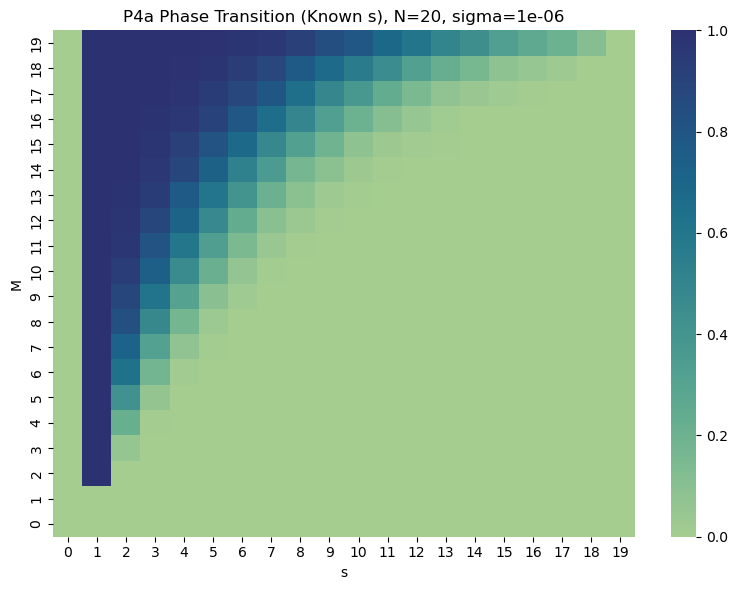

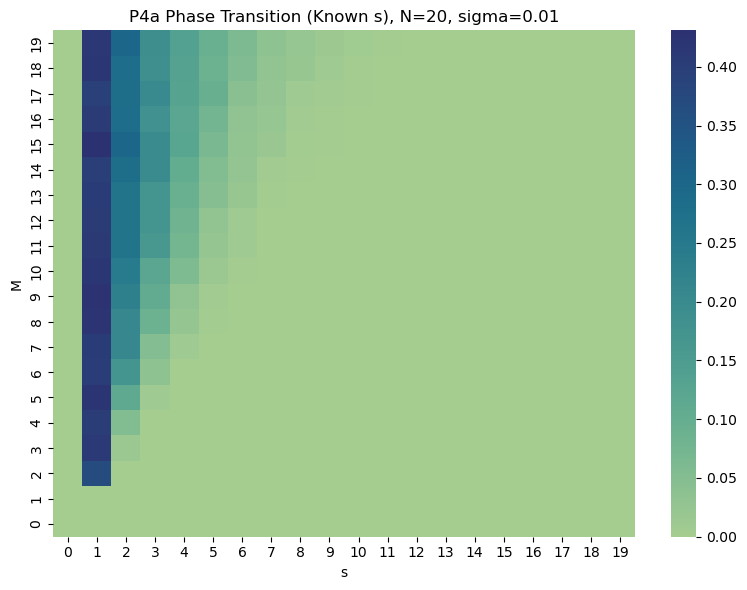

In [86]:
phase_transition_p4b(N=20, sigma=1e-6)
phase_transition_p4b(N=20, sigma=1e-2)

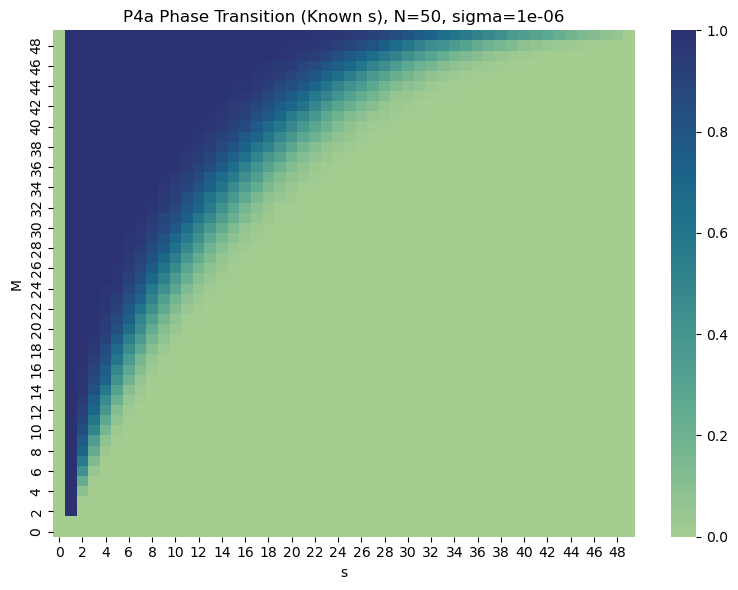

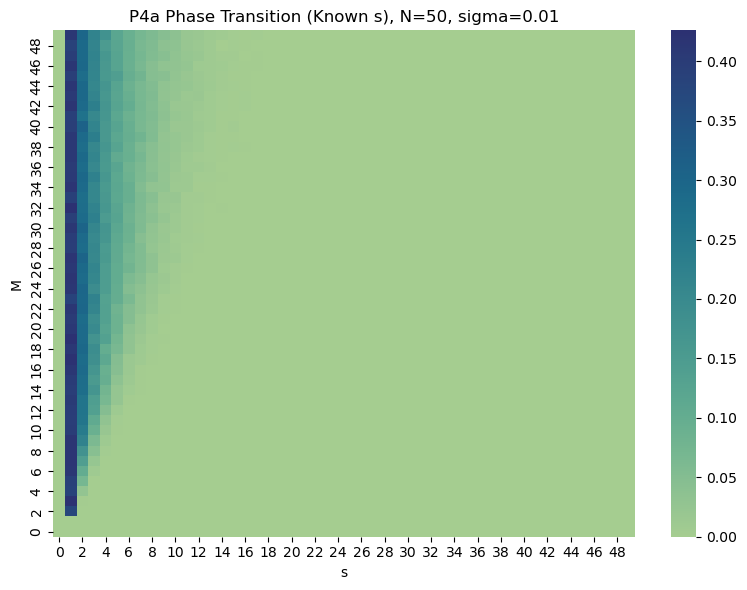

In [87]:
phase_transition_p4b(N=50, sigma=1e-6)
phase_transition_p4b(N=50, sigma=1e-2)

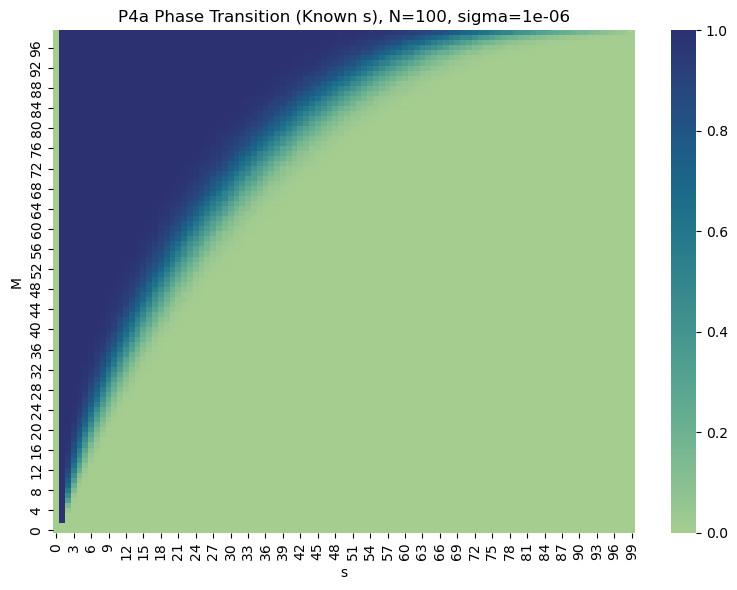

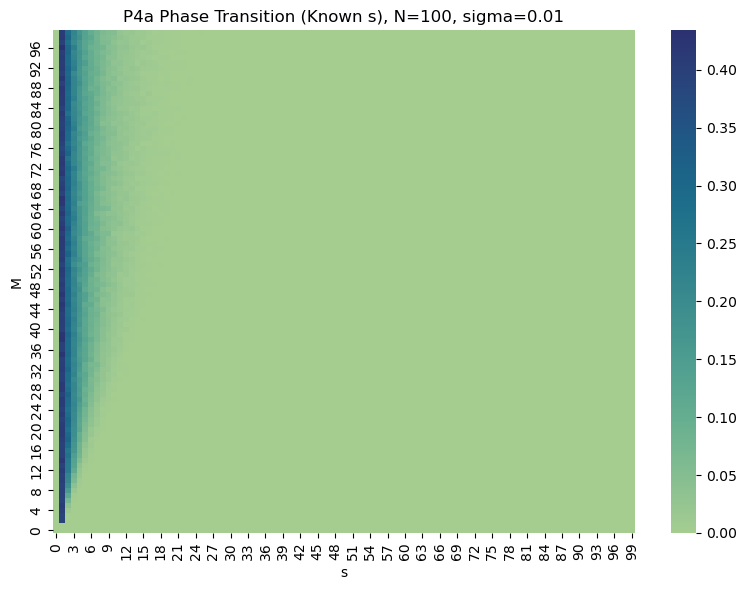

In [88]:
phase_transition_p4b(N=100, sigma=1e-6)
phase_transition_p4b(N=100, sigma=1e-2)

Problem 5. Decode a Compressed Message (a)

In [92]:
def OMP(A,y,threshold,s=None):
    r = y
    indices = []
    iteration = 0
    while np.linalg.norm(r,ord=2) > threshold:
        if s is not None and iteration >= s:
            break
        A_i = np.argmax(np.absolute(A.T.dot(r)))
        indices.append(A_i)
        A_omp = A[:,indices] #get whole column that cause largest A_col.T.dot(r)
        x_hat = np.zeros(shape=(A.shape[1],1))
        # x_hat[indices] = np.linalg.inv(A_omp.T.dot(A_omp)).dot(A_omp.T).dot(y) #replace initial 0 with new x value
        x_hat[indices] = np.linalg.lstsq(A_omp, y, rcond=None)[0]
        r = y - A.dot(x_hat)
        iteration += 1
    return r, indices, x_hat


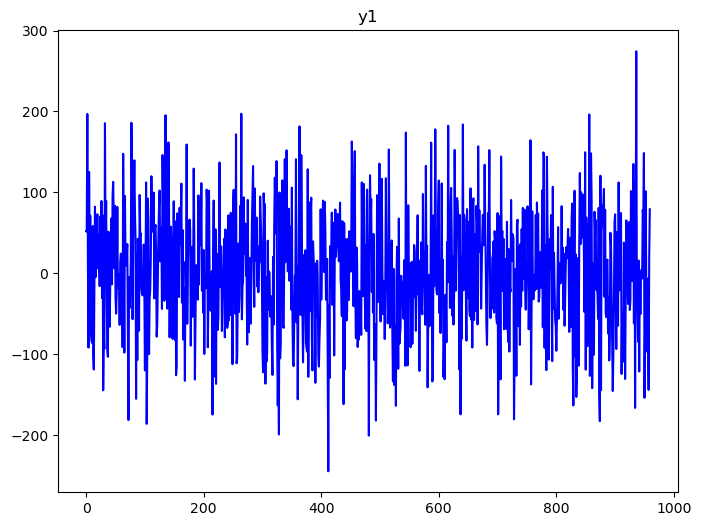

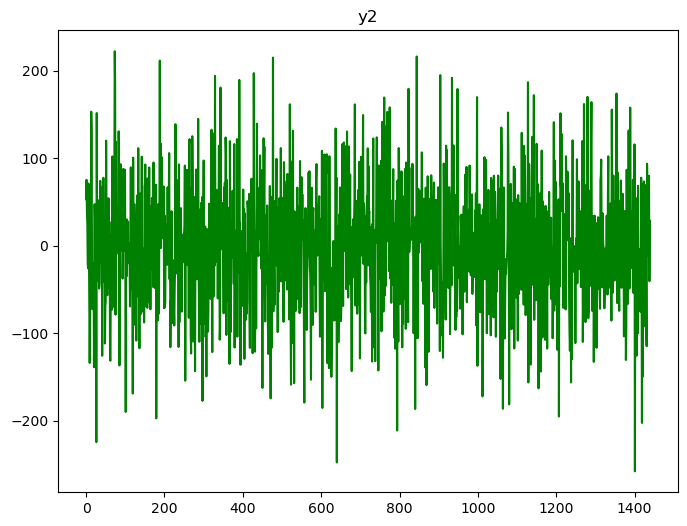

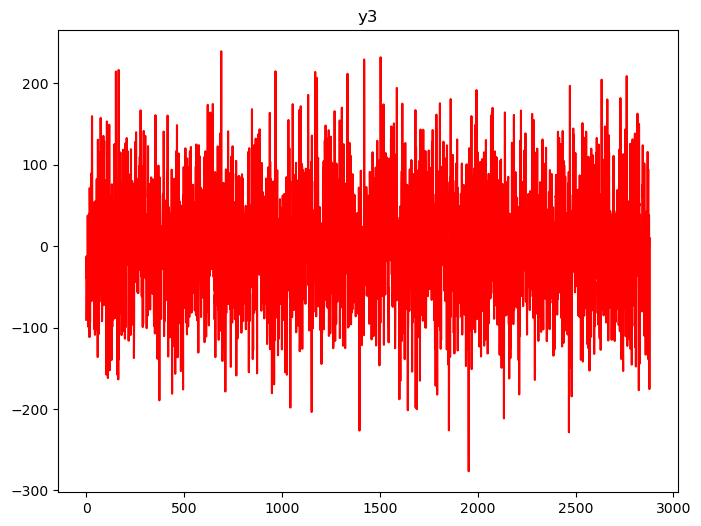

In [97]:
import scipy.io

data = scipy.io.loadmat('Pr5/Y1 Y2 Y3 and A1 A2 A3.mat')
y1, y2, y3 = data['y1'], data['y2'], data['y3']
A1, A2, A3 = data['A1'], data['A2'], data['A3']

plt.figure(figsize=(8, 6))
plt.plot(y1, label='y1', color='blue')
plt.title('y1')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y2, label='y2', color='green')
plt.title('y2')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y3, label='y3', color='red')
plt.title('y3')
plt.show()


Problem 5 (b)

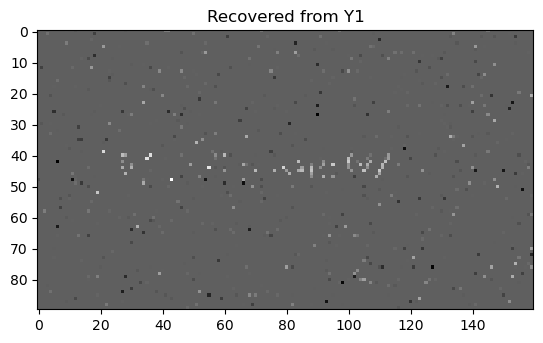

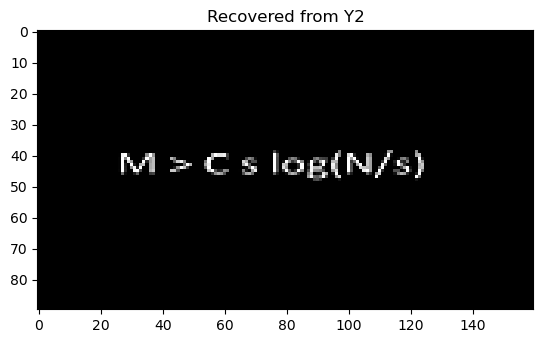

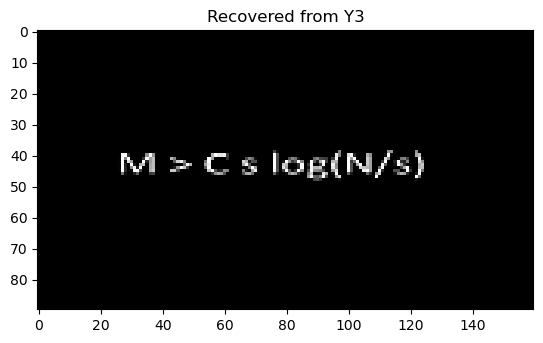

In [98]:
def recover_image_OMP(y, A, threshold=1e-3):
    X_hat_flat = np.zeros((A.shape[1], y.shape[1]))
    
    for col in range(y.shape[1]): 
        y_col = y[:, col:col+1]
        r, indices, x_hat_col = OMP(A, y_col, threshold=threshold)
        X_hat_flat[:, col] = x_hat_col.flatten()
    
    X_recovered = X_hat_flat.reshape((90, 160), order='F')
    return X_recovered

X1 = recover_image_OMP(y1, A1)
plt.imshow(X1, cmap='gray')
plt.title('Recovered from Y1')
plt.show()


X2 = recover_image_OMP(y2, A2)
plt.imshow(X2, cmap='gray')
plt.title('Recovered from Y2')
plt.show()


X3 = recover_image_OMP(y3, A3)
plt.imshow(X3, cmap='gray')
plt.title('Recovered from Y3')
plt.show()

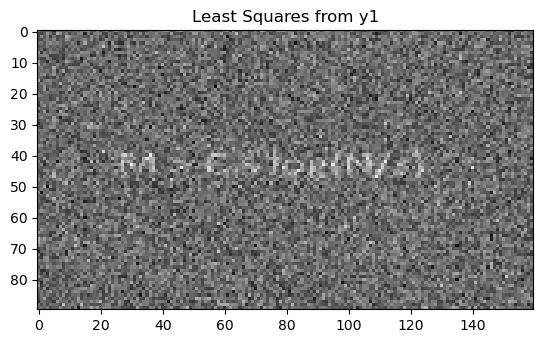

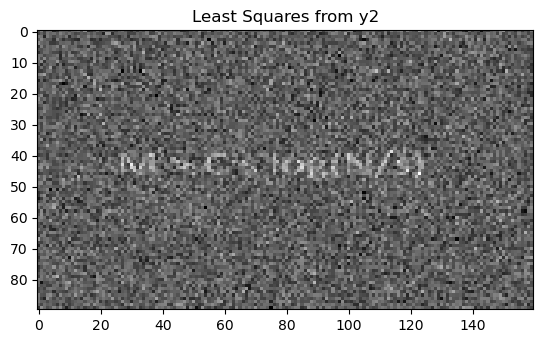

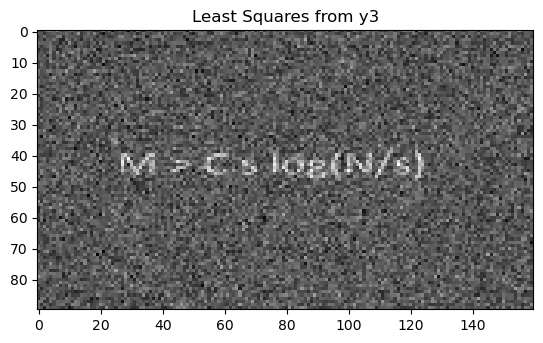

In [99]:
def recover_image_lstsq(y, A):
    X_hat, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
    return X_hat.reshape((90, 160), order='F')

X1_lstsq = recover_image_lstsq(y1, A1)
plt.imshow(X1_lstsq, cmap='gray')
plt.title('Least Squares from y1')
plt.show()

X2_lstsq = recover_image_lstsq(y2, A2)
plt.imshow(X2_lstsq, cmap='gray')
plt.title('Least Squares from y2')
plt.show()

X3_lstsq = recover_image_lstsq(y3, A3)
plt.imshow(X3_lstsq, cmap='gray')
plt.title('Least Squares from y3')
plt.show()

Problem 6. Decode a Compressed Audio Signal

In [111]:
import sounddevice as sd
from PIL import Image

Image.MAX_IMAGE_PIXELS = None 

address = 'Pr6/'
def loading_data(address):
    # Load compressed signal from .mat file
    compressedSignal = scipy.io.loadmat(f'{address}compressedSignal.mat')['compressedSignal']
    compressedSignal = compressedSignal.astype(np.float64)
    
    # Load compression matrix from .mat file
    compressionMatrix = scipy.io.loadmat(f'{address}compressionMatrix.mat')['compressionMatrix']
    
    # Load and process D_compressed from .tiff file
    D_compressed = Image.open(f'{address}CompressedBasis.tiff')
    D_compressed = np.array(D_compressed).astype(np.float64)
    D = D_compressed / 255.0 * 0.1284 - 0.0525
    
    return compressedSignal, D, compressionMatrix

y, D, A = loading_data(address)
sd.play(y.flatten(), 7350) 

In [ ]:
K = [10, 50, 100, 200, 300, 1000, 2000, 3000]

for k in K:
    y_k = y[:k]                 
    A_k = A[:k, :]               
    AD = A_k.dot(D)           
    
    _, _, x_hat = OMP(AD, y_k, threshold=1e-5)  
    
    x_hat = D.dot(x_hat) # Reconstruct audio
    
    print(f'Playing for k={k}...')
    sd.play(x_hat.flatten(), 7350)
    sd.wait() 

Playing for k=10...
Playing for k=50...
Playing for k=100...
Playing for k=200...
Playing for k=300...
Playing for k=1000...
Playing for k=2000...
Playing for k=3000...


In [112]:
K = [10, 50, 100, 200, 300, 1000, 2000, 3000]

for k in K:
    y_k = y[:k]             
    A_k = A[:k, :]              
    AD = A_k.dot(D)  

    s_lstsq, _, _, _ = np.linalg.lstsq(AD, y_k, rcond=None)
    x_lstsq = D.dot(s_lstsq)
    print(f'Playing for k={k}...')
    sd.play(x_lstsq.flatten(), 7350)
    sd.wait()

Playing for k=10...
Playing for k=50...
Playing for k=100...
Playing for k=200...
Playing for k=300...
Playing for k=1000...
Playing for k=2000...
Playing for k=3000...
